#First we will import the MNIST dataset from Keras and assign the train and test datasets

In [87]:
import tensorflow as tf
(x_train,y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#Next we will import the Sequential model, the Dense layer, the to_categorial utility and the SGD optimizer from Keras

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

## Next we will convert the 3-dimensional dataset into a 2-dimensional matrix by the reshape command

In [89]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)                  #confirming the dimensionality of the matrix
print(x_test.shape)

(60000, 784)
(10000, 784)


#Next we will convert the values from unsigned integers to floats and normalize with the maximum value (255)

In [90]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#The next step is to perform one-hot encoding on the categorial data

In [91]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#Now we create the Sequential model and add the layers.

In [92]:
# Create the model

model = Sequential()

# 1st layer
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())               # BatchNormalization maintains the mean output around 0 and the output std. dev. close to 1
model.add(Dropout(0.2))

# 2nd layer
model.add(Dense(50, activation='tanh'))       # Model now assigns the input_shape to be same as previous dense command
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))



#We finally define the number of epochs, create a learning rate schedule and compile the model

Model is trained on the training dataset provided

The model is evaluated against the validation to calculate the loss at the end of each epoch

In [93]:

sgd = SGD(learning_rate=0.07, nesterov=False)
model.compile(optimizer= sgd,loss='categorical_crossentropy', metrics=['accuracy'])                                 # model compilation
history3 = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test))       # training the model


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8115 - loss: 0.6157 - val_accuracy: 0.9458 - val_loss: 0.1806
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9304 - loss: 0.2320 - val_accuracy: 0.9548 - val_loss: 0.1455
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9453 - loss: 0.1832 - val_accuracy: 0.9611 - val_loss: 0.1224
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9522 - loss: 0.1563 - val_accuracy: 0.9685 - val_loss: 0.1054
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9578 - loss: 0.1384 - val_accuracy: 0.9696 - val_loss: 0.1015
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9623 - loss: 0.1231 - val_accuracy: 0.9727 - val_loss: 0.0911
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9641 - loss: 0.1179 - val_accuracy: 0.9719 - val_loss: 0.0904
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9675 - loss: 0.1074 - val_accuracy: 0.

# Printing history of the fit showing training and validation accuracy as a function of epochs


In [94]:
Train_Acc_list = []
Val_Acc_list = []
epoch_list = []

for epoch in range(len(history3.history['accuracy'])):
    epoch_list.append(epoch + 1)
    Train_Acc_list.append(history3.history['accuracy'][epoch])
    Val_Acc_list.append(history3.history['val_accuracy'][epoch])
    print(f"Epoch {epoch+1}: "
          f"Train Accuracy = {history3.history['accuracy'][epoch]:.4f}, "
          f"Validation Accuracy = {history3.history['val_accuracy'][epoch]:.4f}")

#print(Train_Acc_list)
#print(Val_Acc_list)

Epoch 1: Train Accuracy = 0.8788, Validation Accuracy = 0.9458
Epoch 2: Train Accuracy = 0.9353, Validation Accuracy = 0.9548
Epoch 3: Train Accuracy = 0.9460, Validation Accuracy = 0.9611
Epoch 4: Train Accuracy = 0.9540, Validation Accuracy = 0.9685
Epoch 5: Train Accuracy = 0.9589, Validation Accuracy = 0.9696
Epoch 6: Train Accuracy = 0.9627, Validation Accuracy = 0.9727
Epoch 7: Train Accuracy = 0.9650, Validation Accuracy = 0.9719
Epoch 8: Train Accuracy = 0.9669, Validation Accuracy = 0.9732
Epoch 9: Train Accuracy = 0.9692, Validation Accuracy = 0.9750
Epoch 10: Train Accuracy = 0.9704, Validation Accuracy = 0.9754
Epoch 11: Train Accuracy = 0.9725, Validation Accuracy = 0.9752
Epoch 12: Train Accuracy = 0.9733, Validation Accuracy = 0.9754
Epoch 13: Train Accuracy = 0.9749, Validation Accuracy = 0.9753
Epoch 14: Train Accuracy = 0.9745, Validation Accuracy = 0.9781
Epoch 15: Train Accuracy = 0.9746, Validation Accuracy = 0.9772
Epoch 16: Train Accuracy = 0.9755, Validation Acc

# Plotting Training and Validation Accuracies against no. of Epochs

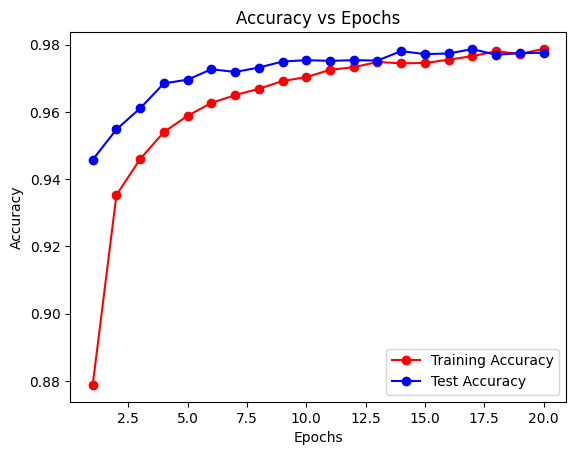

In [95]:
#Plotting Accuracy vs Epochs

fig, ax = plt.subplots()

ax.plot(epoch_list, Train_Acc_list, marker = 'o', color = "red", label = 'Training Accuracy')
ax.plot(epoch_list, Val_Acc_list, marker = 'o', color = "blue", label = 'Test Accuracy')

ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")

plt.legend(loc = 'lower right')

plt.show()

# Plot in percentage accuracy

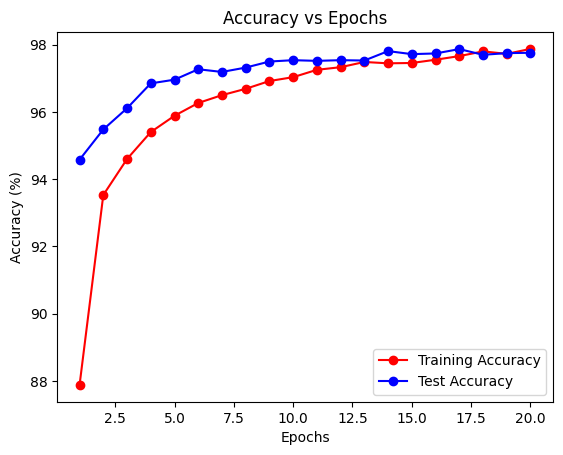

In [98]:
import numpy as np

#Plotting Accuracy (percentage) vs Epochs

fig, ax = plt.subplots()

ax.plot(epoch_list, np.array(Train_Acc_list)*100, marker = 'o', color = "red", label = 'Training Accuracy')
ax.plot(epoch_list, np.array(Val_Acc_list)*100, marker = 'o', color = "blue", label = 'Test Accuracy')

ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy vs Epochs")

plt.legend(loc = 'lower right')

plt.show()